In [39]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
import matplotlib.pyplot as plt

In [40]:
# Reading Training Set

targetName = "Mono"

fileNameNP = "../../Met_Files/Monoamine_oxidase_A_CHEMBL1951_NP.csv"
fileNameNonNP = "../../Met_Files/Monoamine_oxidase_A_CHEMBL1951_nonNP.csv"

dfTrain = pd.read_csv(fileNameNonNP)
dfTest = pd.read_csv(fileNameNP)

In [41]:
# Calculating Descriptors
smiles_stringsTrain = dfTrain['SMILES'].tolist()
smiles_stringsTest = dfTest['SMILES'].tolist()
smiles_listTrain = []
smiles_listTest = []
for i in range(0, len(smiles_stringsTrain)):
  smiles_listTrain.append(Chem.MolFromSmiles(smiles_stringsTrain[i]))
for i in range(0, len(smiles_stringsTest)):
  smiles_listTest.append(Chem.MolFromSmiles(smiles_stringsTest[i]))
chosen_descriptors = ['MolWt', 'MolLogP', 'NumRotatableBonds', 'NumHAcceptors', 'NumHDonors']
mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)
descrsTrain = [mol_descriptor_calculator.CalcDescriptors(mol) for mol in smiles_listTrain]
descrsTest = [mol_descriptor_calculator.CalcDescriptors(mol) for mol in smiles_listTest]
df2Train = pd.DataFrame(descrsTrain)
df2Test = pd.DataFrame(descrsTest)

In [42]:
# Appending Descriptors to Existing Dataframes
for i in range(0, len(chosen_descriptors)):
    curName = chosen_descriptors[i]
    dfTrain[curName] = df2Train[i].tolist() 
    dfTest[curName] = df2Test[i].tolist()

In [43]:
# Assigns True or False Depending on Whether a Compound Follows Lipinski Rules
def lipinskiAssign(df):
    conditions = [(df.NumHDonors <= 5) & (df.NumHAcceptors <= 10) & (df.MolWt <= 500) & (df.MolLogP <= 5)]
    result = pd.Series([all(cond) for cond in zip(*conditions)]).astype(bool)
    return df.assign(Lipinski=result)
dfTrain = lipinskiAssign(dfTrain)
dfTest = lipinskiAssign(dfTest)
#dfTrain.head()

In [44]:
# Analyzing Statistics of Dataframes
print("Training Set Statistics:")
print(dfTrain.describe())
print("")
print("Test Set Statistics:")
print(dfTest.describe())

Training Set Statistics:
             pIC50        MolWt      MolLogP  NumRotatableBonds  \
count  2256.000000  2256.000000  2256.000000        2256.000000   
mean      5.391976   337.762141     3.727727           4.496011   
std       1.057964    87.314082     1.370323           2.851068   
min       3.510000    75.071000    -1.471600           0.000000   
25%       4.590000   280.270500     2.826050           3.000000   
50%       5.150000   319.360000     3.664550           4.000000   
75%       5.920000   380.889000     4.617105           6.000000   
max      10.000000   837.606000     9.215500          26.000000   

       NumHAcceptors   NumHDonors  
count    2256.000000  2256.000000  
mean        4.005762     0.996897  
std         1.581619     0.918636  
min         1.000000     0.000000  
25%         3.000000     0.000000  
50%         4.000000     1.000000  
75%         5.000000     1.000000  
max         9.000000    12.000000  

Test Set Statistics:
            pIC50       M

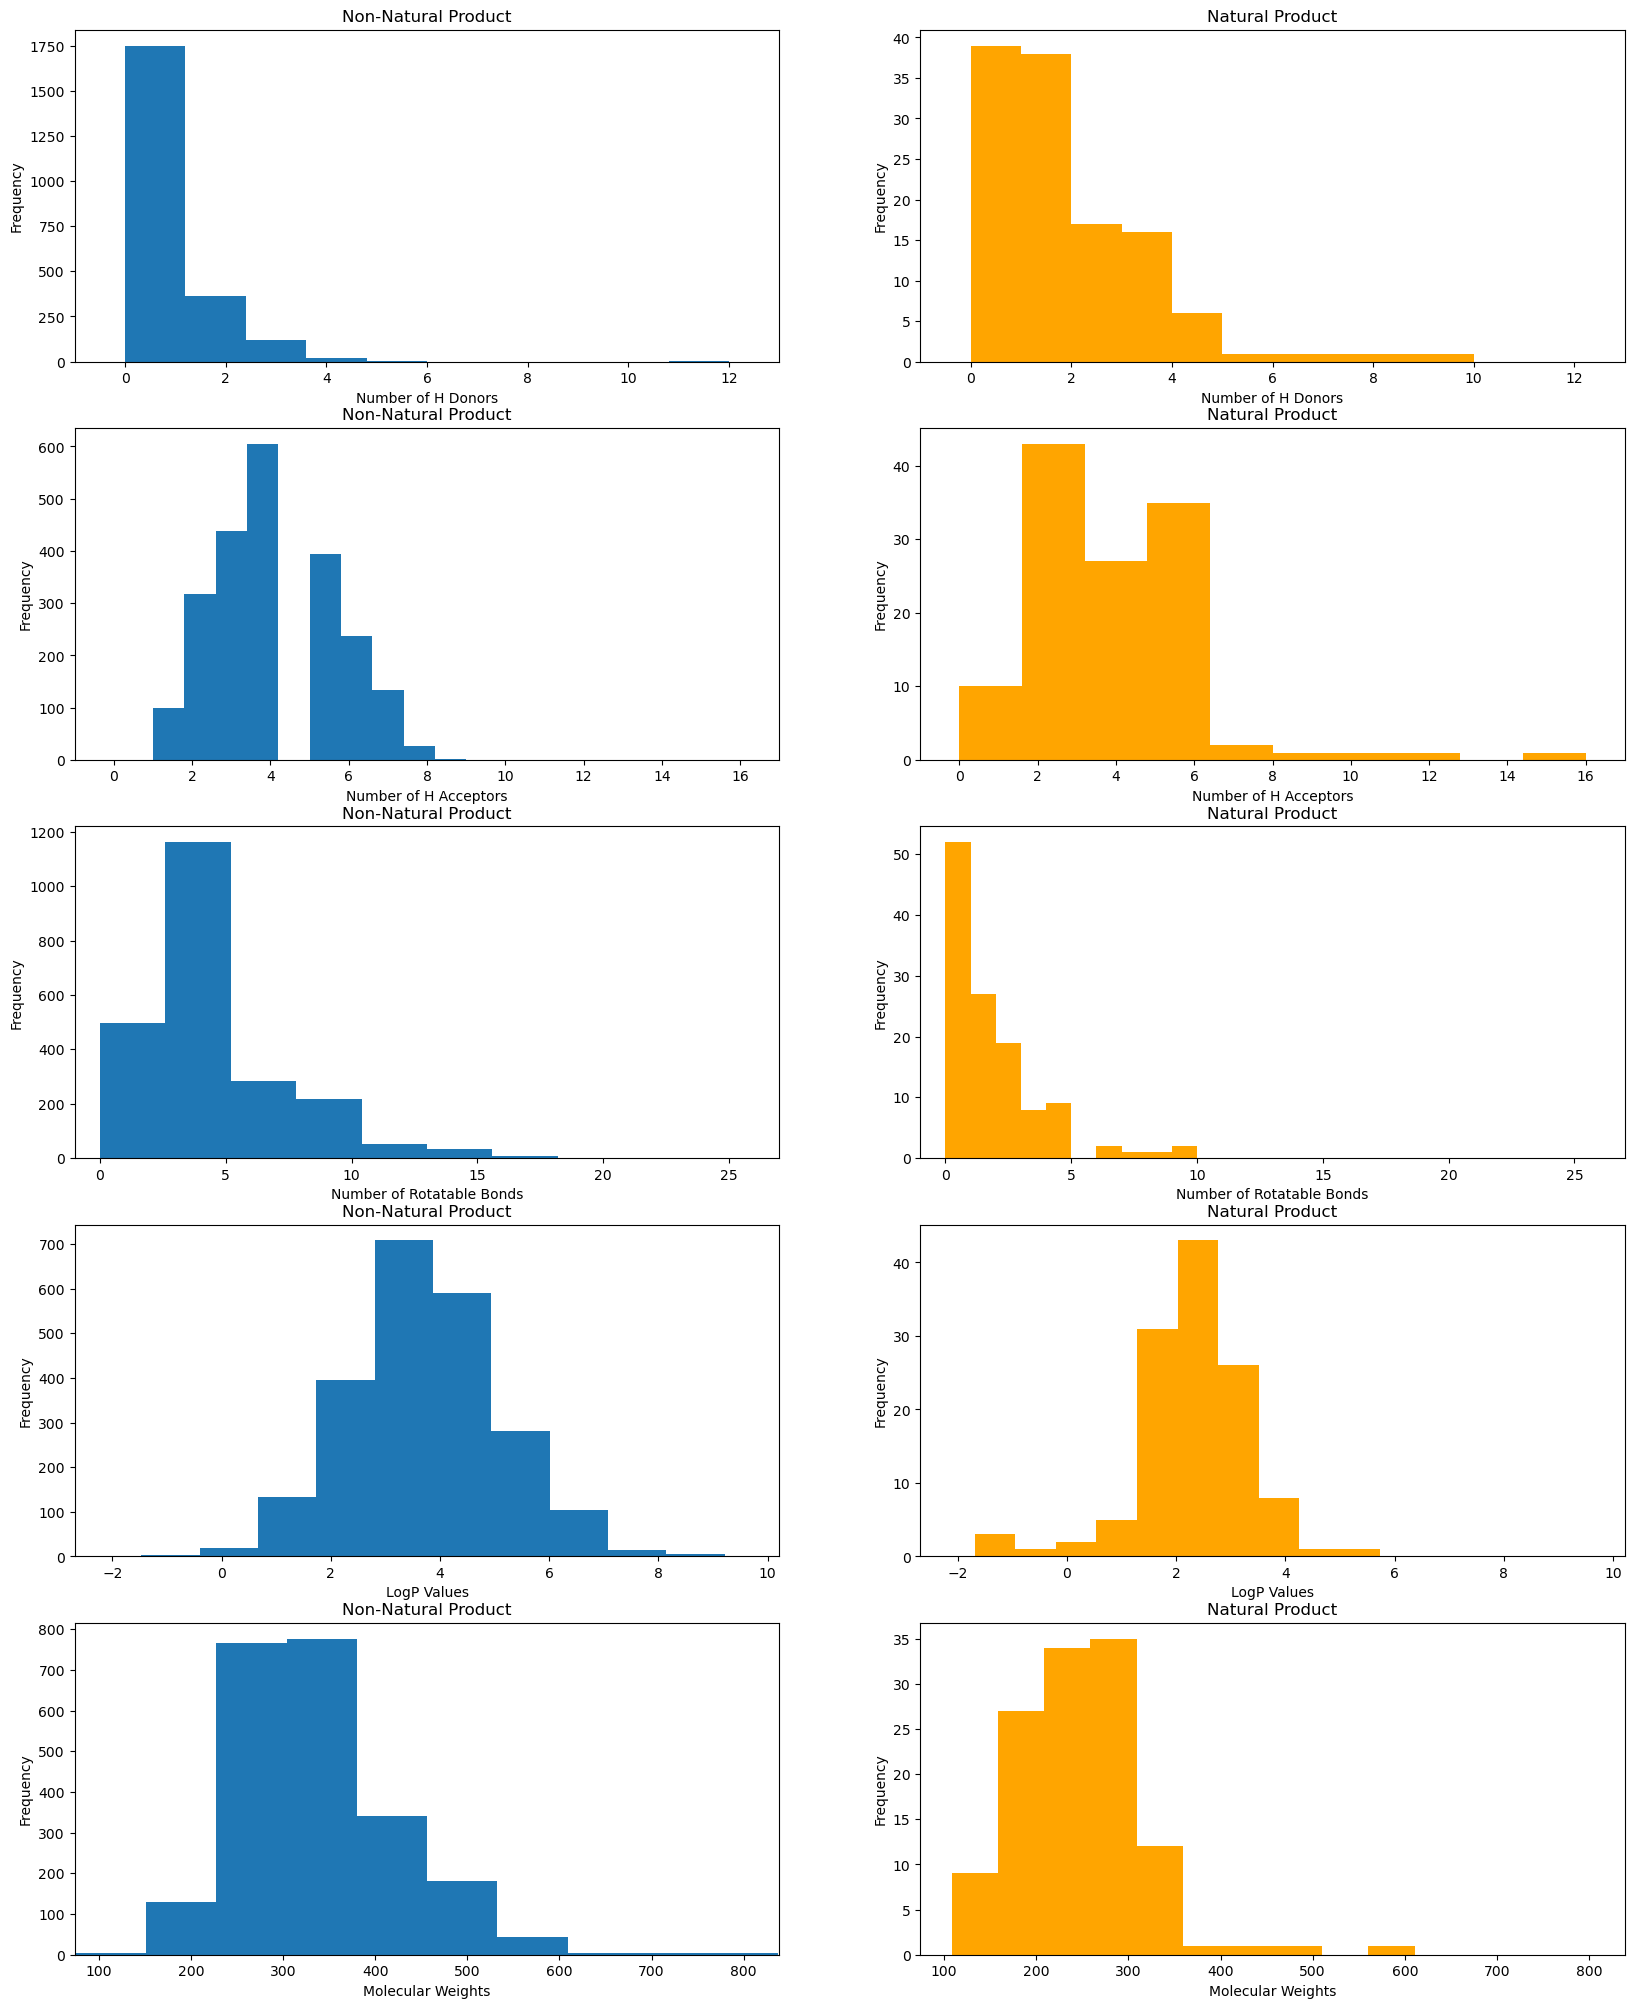

In [57]:
# Number of H Donors
fig,ax = plt.subplots(5,2,figsize=(20,25))

minValHD = min(dfTrain['NumHDonors'].min(), dfTest['NumHDonors'].min())
maxValHD = max(dfTrain['NumHDonors'].max(), dfTest['NumHDonors'].max())
dfTrain['NumHDonors'].plot(kind="hist",ax=ax[0, 0], title = "Non-Natural Product", xlabel = "Number of H Donors", xlim = (minValHD - 1, maxValHD + 1))
dfTest['NumHDonors'].plot(kind="hist",ax=ax[0, 1], title = "Natural Product", xlabel = "Number of H Donors", color = 'orange', xlim = (minValHD - 1, maxValHD + 1))

# Number of H Acceptors
minValHA = min(dfTrain['NumHAcceptors'].min(), dfTest['NumHAcceptors'].min())
maxValHA = max(dfTrain['NumHAcceptors'].max(), dfTest['NumHAcceptors'].max())
dfTrain['NumHAcceptors'].plot(kind="hist",ax=ax[1, 0], title = "Non-Natural Product", xlabel = "Number of H Acceptors", xlim = (minValHA - 1, maxValHA + 1))
dfTest['NumHAcceptors'].plot(kind="hist",ax=ax[1, 1], title = "Natural Product", xlabel = "Number of H Acceptors", color = 'orange', xlim = (minValHA - 1, maxValHA + 1))

# Number of Rotatable Bonds
minValRB = min(dfTrain['NumRotatableBonds'].min(), dfTest['NumRotatableBonds'].min())
maxValRB = max(dfTrain['NumRotatableBonds'].max(), dfTest['NumRotatableBonds'].max())
dfTrain['NumRotatableBonds'].plot(kind="hist",ax=ax[2, 0], title = "Non-Natural Product", xlabel = "Number of Rotatable Bonds", xlim = (minValRB - 1, maxValRB + 1))
dfTest['NumRotatableBonds'].plot(kind="hist",ax=ax[2, 1], title = "Natural Product", xlabel = "Number of Rotatable Bonds", color = 'orange', xlim = (minValRB - 1, maxValRB + 1))

# LogP
minValLP = min(dfTrain['MolLogP'].min(), dfTest['MolLogP'].min())
maxValLP = max(dfTrain['MolLogP'].max(), dfTest['MolLogP'].max())
dfTrain['MolLogP'].plot(kind="hist",ax=ax[3, 0], title = "Non-Natural Product", xlabel = "LogP Values", xlim = (minValLP - 1, maxValLP + 1))
dfTest['MolLogP'].plot(kind="hist",ax=ax[3, 1], title = "Natural Product", xlabel = "LogP Values", color = 'orange', xlim = (minValLP - 1, maxValLP + 1))

# Molecular Weights
minValMW = min(dfTrain['MolWt'].min(), dfTest['MolWt'].min())
maxValMW = max(dfTrain['MolWt'].max(), dfTest['MolWt'].max())
dfTrain['MolWt'].plot(kind="hist",ax=ax[4, 0], title = "Non-Natural Product", xlabel = "Molecular Weights", xlim = (minValMW - 1, maxValMW + 1))
dfTest['MolWt'].plot(kind="hist",ax=ax[4, 1], title = "Natural Product", xlabel = "Molecular Weights", color = 'orange', xlim = (minValMW - 1, maxValMW + 1))

plt.savefig(f'{targetName}-Descriptor-Distribution.png')
plt.show()